In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

import pylab
pylab.rcParams['figure.figsize'] = (20, 20)
plt.style.use('fivethirtyeight')

test='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(test,index_col='date', parse_dates=True)
usa=df[df['location'] == 'United States']
usa_rolling7=usa.new_deaths.rolling(7).mean().fillna(0)
usa_rolling7

# datetime processing
import datetime as datetime
from datetime import datetime as dt
today=dt.today()

today = datetime.date(month=today.month, day=today.day, year=today.year)
yesterday=today-datetime.timedelta(days=1)

print('TODAY: ',today)

print('YESTERDAY: ',yesterday, yesterday.strftime("%A"))

TODAY:  2021-06-29
YESTERDAY:  2021-06-28 Monday


# <font color=#cf0234> Total COVID-19 Deaths in United States as of Today </font>

In [3]:
usa_daily=usa['total_deaths'].diff(1)
yesterday=usa_daily[-1]

In [4]:
# sigma_cases=sum(usa_daily.fillna(0))
print(f"USA TOTAL DEATH COUNT: {sum(usa_daily.fillna(0)):,} as of "+today.strftime("%A")+' '+str( today))

USA TOTAL DEATH COUNT: 604,114.0 as of Tuesday 2021-06-29


# <font color=#cf0234> Yesterday's Deaths </font>
   

In [5]:
print(f"Yesterday's Deaths {today}: ",f"{yesterday:,}")

Yesterday's Deaths 2021-06-29:  150.0


# <font color=#cf0234> Most recent daily deaths </font>
   

In [6]:
# Past Two Weeks
usa_daily.tail(14)

date
2021-06-15    311.0
2021-06-16    371.0
2021-06-17    282.0
2021-06-18    594.0
2021-06-19    171.0
2021-06-20     86.0
2021-06-21    268.0
2021-06-22    323.0
2021-06-23    375.0
2021-06-24    341.0
2021-06-25    498.0
2021-06-26    147.0
2021-06-27     74.0
2021-06-28    150.0
Name: total_deaths, dtype: float64

Text(0.5, 0, 'Date')

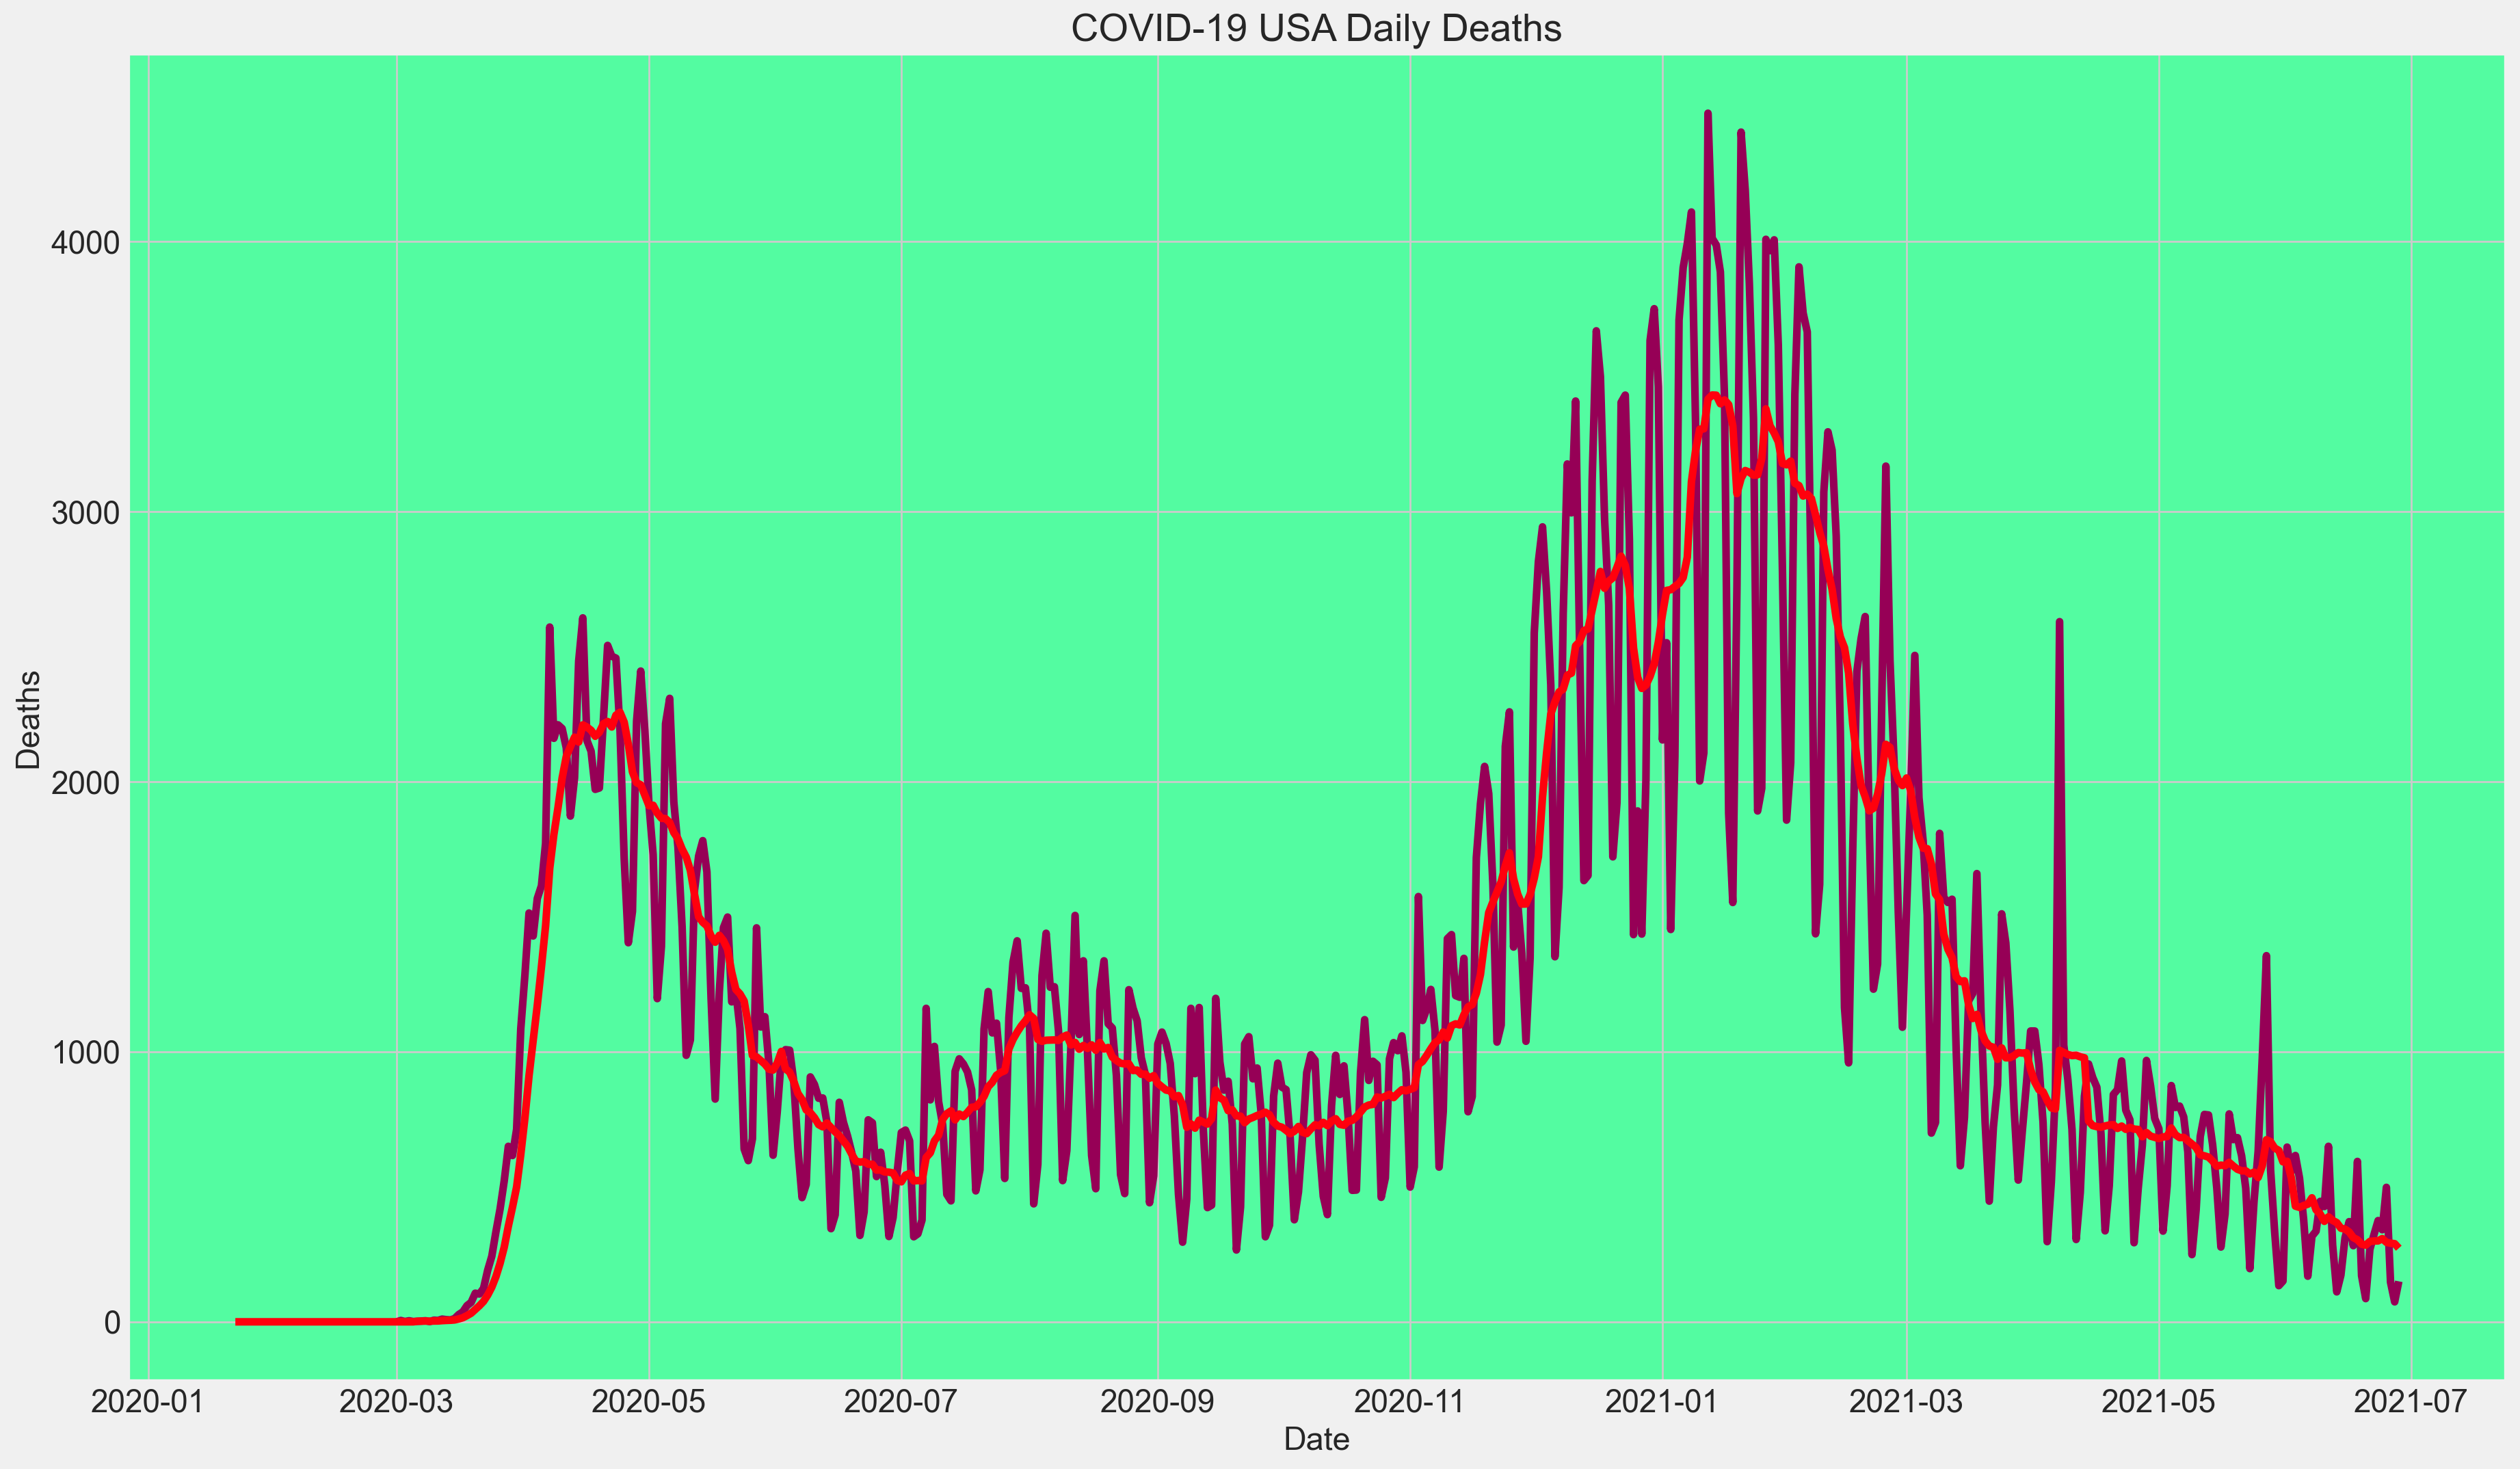

In [7]:
fig = plt.figure(figsize=(20,12),dpi=200)
x1=usa['total_deaths'].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056')
ax=sns.lineplot(data=usa_rolling7, x=usa_rolling7.index,y=usa_rolling7,color='#ff000d')
ax.set_title('COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_covid_deaths_all.png',dpi=165, bbox_inches='tight')

Text(0.5, 0, 'Date')

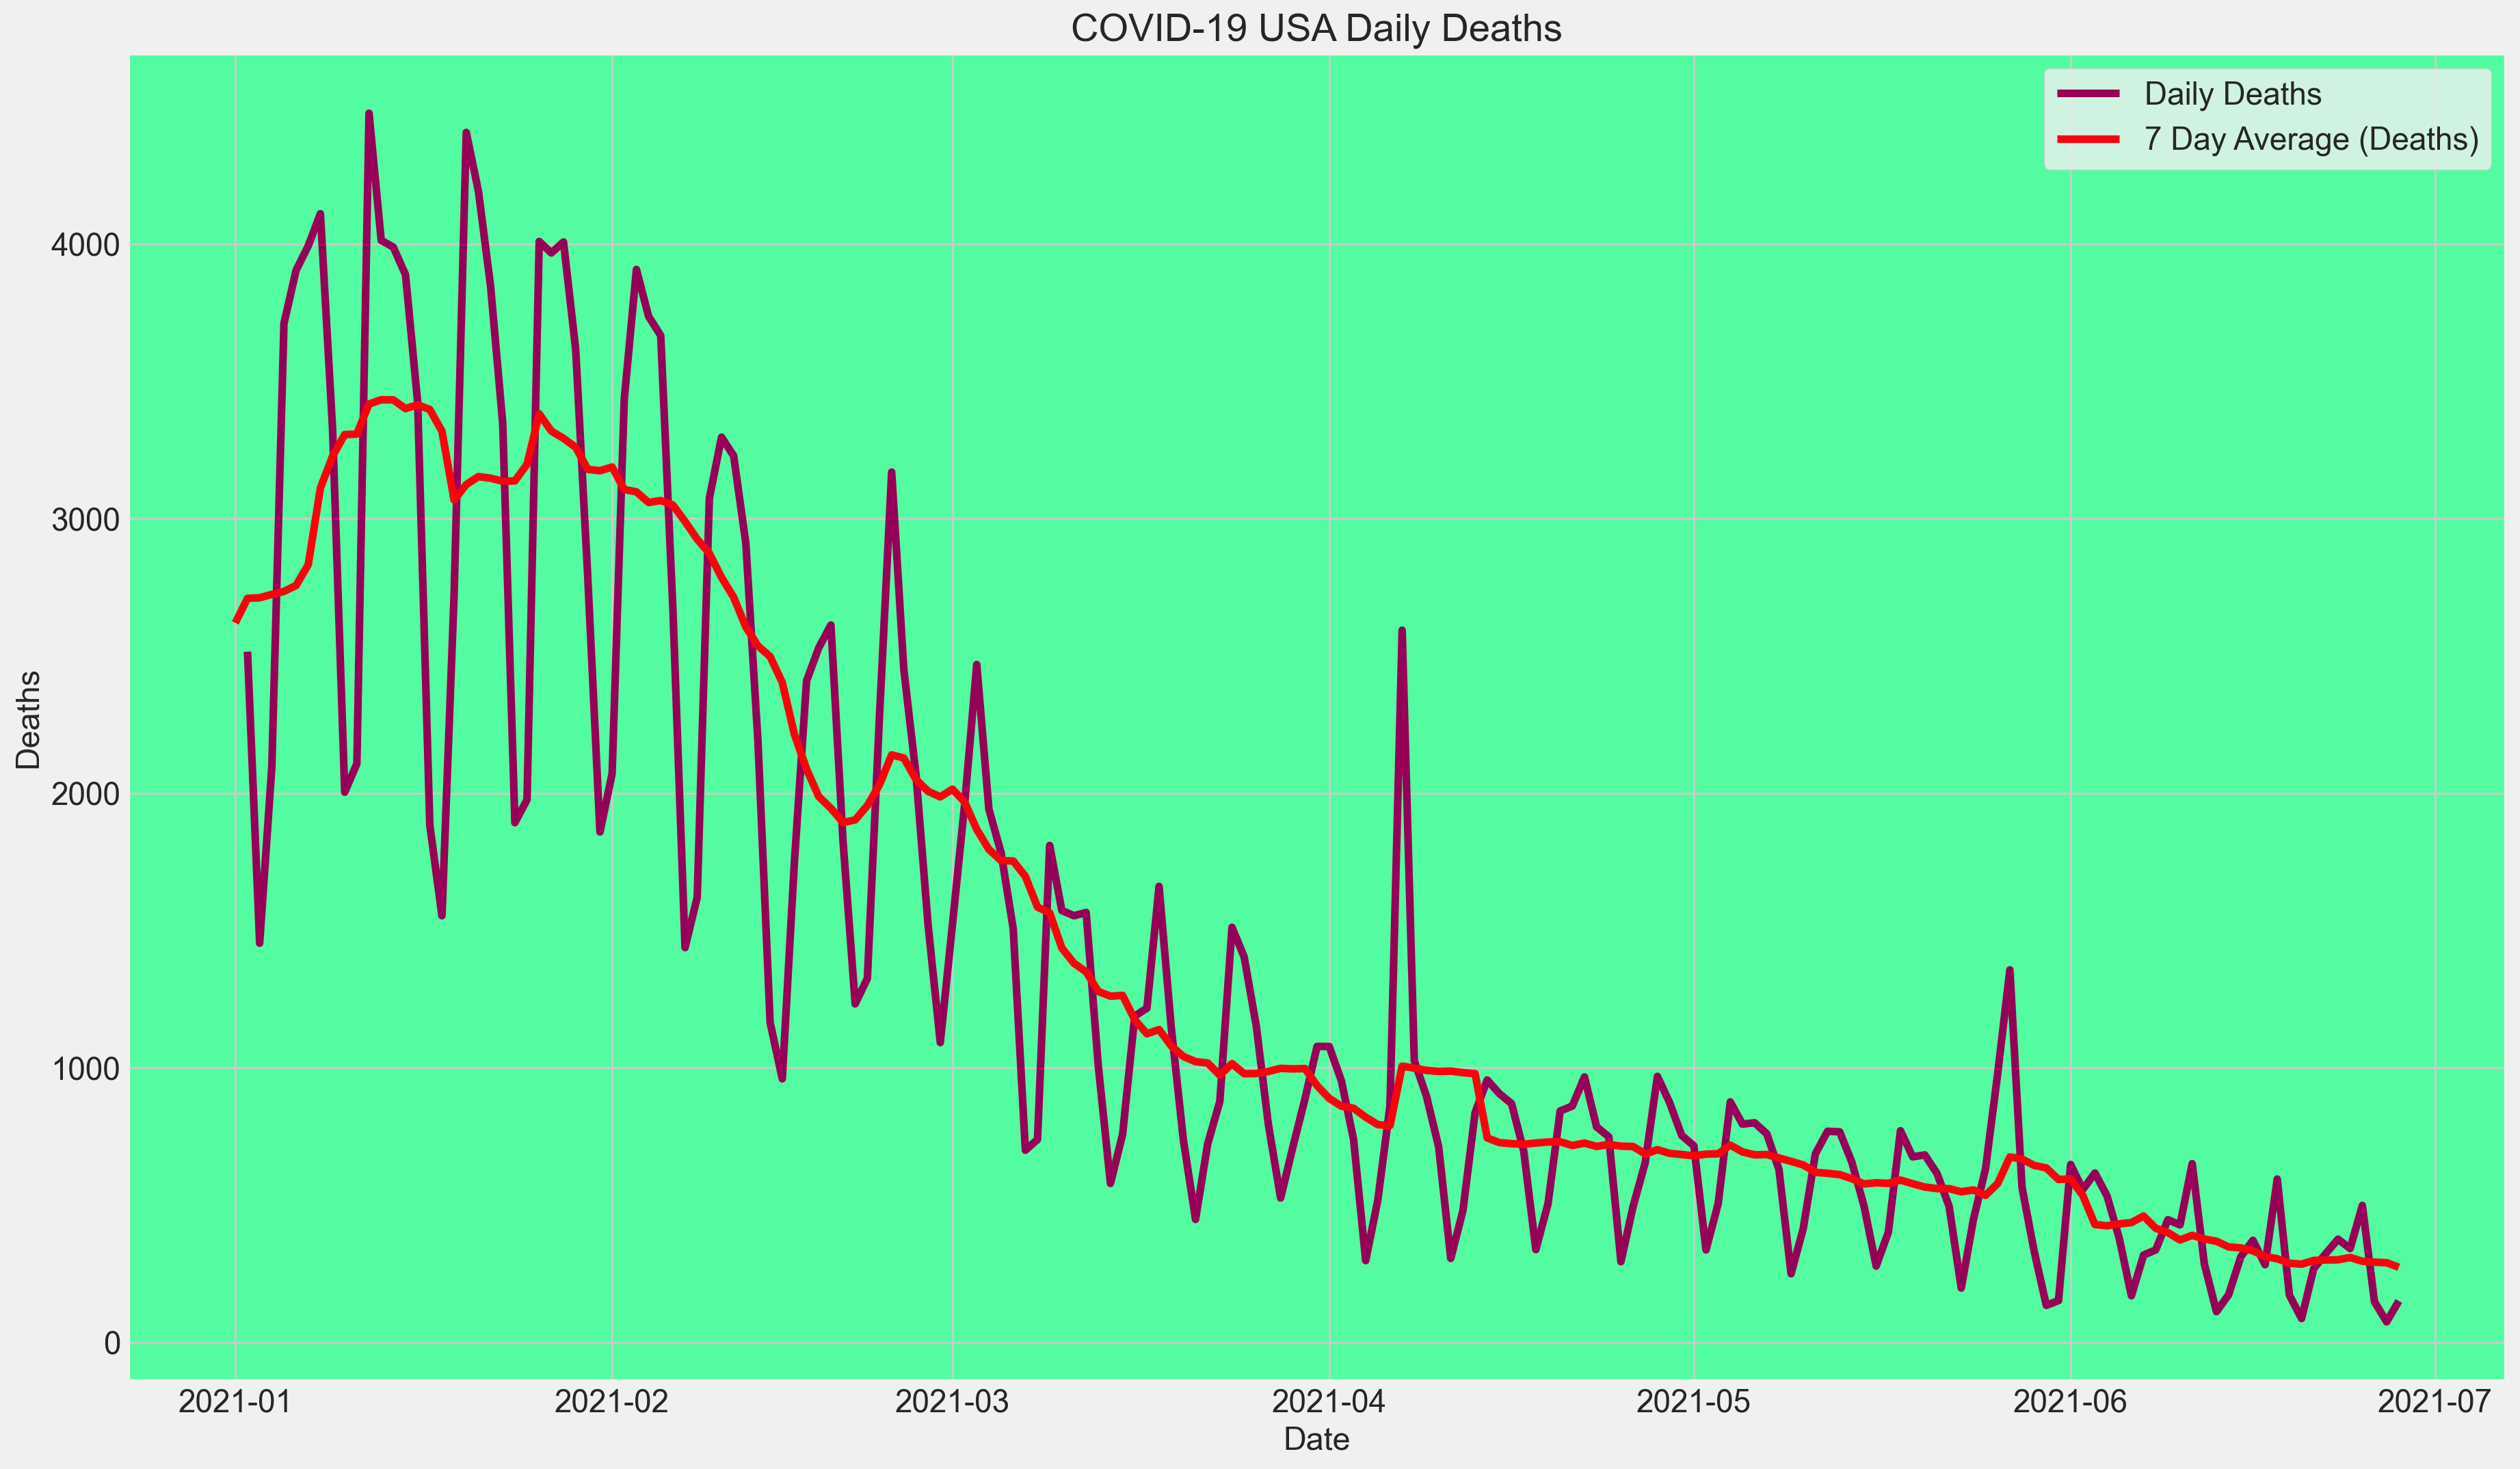

In [8]:
usa_rolling7=usa_rolling7.loc['2021':]
fig = plt.figure(figsize=(20,12),dpi=200)
x1=usa['total_deaths'].loc['2021':].diff(1)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056', label='Daily Deaths')
ax=sns.lineplot(data=usa_rolling7, x=usa_rolling7.index,y=usa_rolling7,color='#ff000d',label='7 Day Average (Deaths)')
ax.set_title('COVID-19 USA Daily Deaths')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
# fig.savefig(f'{today}_covid19_deaths.png',dpi=165, bbox_inches='tight')

# <font color='slateblue'> Deadliest COVID-19 day in USA

In [20]:
print(f"{usa_daily.max():,.0f}"," deaths occurred on ",usa_daily.idxmax().strftime("%B, %d, %Y") )

4,476  deaths occurred on  January, 12, 2021
